# Blood Cell Images Data Set

### Get the Data

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input , losses
from keras.layers.core import Dense , Flatten
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random

%matplotlib inline

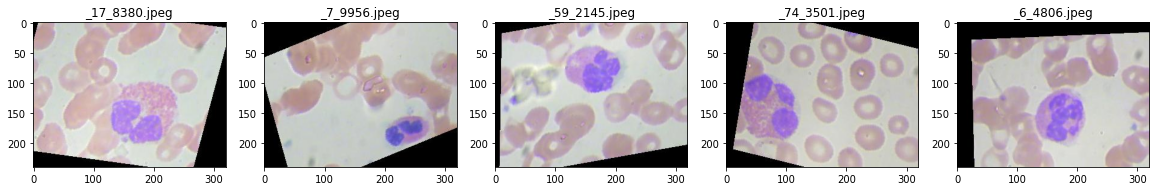

In [59]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\Berkay\Desktop\MLDL Projects\Blood Cell Images Images with Tensorflow\Blood-Cell-Images-with-Tensorflow\images\TRAIN\EOSINOPHIL'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [60]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\Users\Berkay\Desktop\MLDL Projects\Chest X Ray Images with Tensorflow\Chest-X-Ray-Images-with-Tensorflow\images\TRAIN'

In [61]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'C:/Users/Berkay/Desktop/MLDL Projects/Blood Cell Images Images with Tensorflow\Blood-Cell-Images-with-Tensorflow\images\TRAIN')

In [62]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [63]:
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]

In [64]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

Epoch 1/5
312/312 [==============================] - 85s 267ms/step - loss: 5.6356 - accuracy: 0.2533
Epoch 2/5
312/312 [==============================] - 79s 253ms/step - loss: 5.1180 - accuracy: 0.2508
Epoch 3/5
312/312 [==============================] - 73s 233ms/step - loss: 5.1180 - accuracy: 0.2508
Epoch 4/5
312/312 [==============================] - 74s 236ms/step - loss: 5.1180 - accuracy: 0.2508
Epoch 5/5
312/312 [==============================] - 75s 240ms/step - loss: 5.1180 - accuracy: 0.2508


In [ ]:
history = model.fit(x=tf.cast(np.array(img_data), tf.float64), y=tf.cast(list(map(int,target_val)),tf.int32), epochs=5)